In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#Import Tree Models from scratch functions
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/TreeModelsFromScratch")

from DecisionTree import DecisionTree
from RandomForest import RandomForest

In [6]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from imodels import HSTreeClassifier, HSTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

# Random Forest models

## Regression

In [247]:
X_r, y_r = datasets.load_diabetes(return_X_y=True, as_frame=True)

# Train test split
X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

### Vanilla sklearn

In [242]:
n_estimators = 1

In [467]:
reg_sklearn = RandomForestRegressor(n_estimators=n_estimators, max_depth=5, max_features=None, bootstrap=False, random_state=42)
reg_sklearn.fit(X_r_train, y_r_train)

RandomForestRegressor(bootstrap=False, max_depth=5, max_features=None,
                      n_estimators=1, random_state=42)

In [468]:
y_r_pred = reg_sklearn.predict(X_r_test)

In [469]:
rmse_sklearn = mean_squared_error(y_r_test, y_r_pred, squared=True)
rmse_sklearn

3952.9518415860302

In [470]:
reg_sklearn.estimators_[0].random_state

1608637542

In [471]:
#_, ax = plt.subplots(figsize=(5,1.5))
#plot_tree(reg_sklearn, feature_names=X_r_train.columns, node_ids=True, filled=True, ax=ax);

In [472]:
reg_sklearn.base_estimator_.random_state

### Vanilla HS from imodels package

In [473]:
from sklearn.base import clone
reg_sklearn_forHS = clone(reg_sklearn)

In [474]:
reg_hs = HSTreeRegressor(reg_sklearn_forHS, reg_param=1., shrinkage_scheme_="node_based")

reg_hs.fit(X_r_train, y_r_train)

In [11]:
y_r_pred_imodels = reg_hs.predict(X_r_test)

In [12]:
rmse_imodels = mean_squared_error(y_r_test, y_r_pred_imodels, squared=True)
rmse_imodels

3877.1962740983845

In [13]:
reg_hs.get_params()

{'reg_param': 1.0,
 'estimator_': DecisionTreeRegressor(max_depth=2, random_state=42),
 'shrinkage_scheme_': 'node_based'}

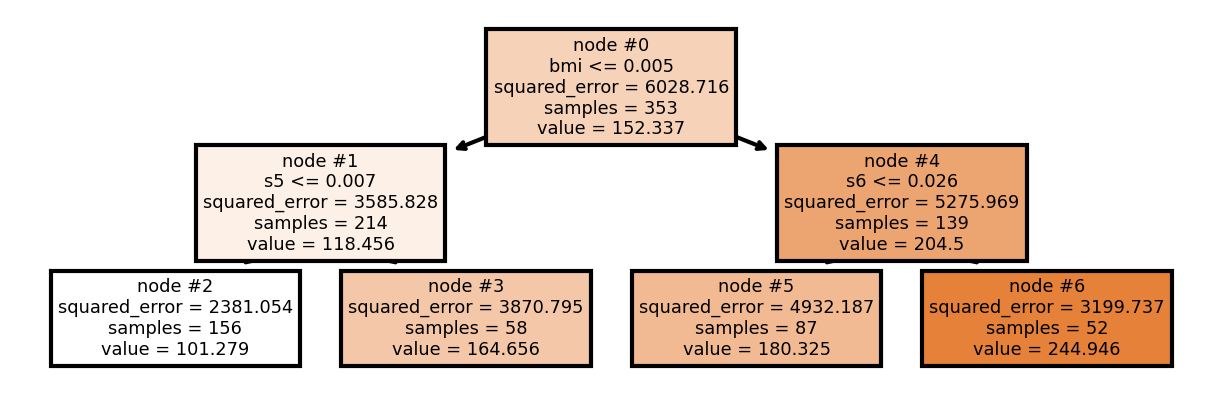

In [14]:
_, ax = plt.subplots(figsize=(5,1.5))
plot_tree(reg_hs.estimator_, feature_names=X_r_train.columns, node_ids=True, filled=True, ax=ax);

### TreeModels from Scratch 

#### Without HS

In [488]:
# Train DecisionTree from scratch
reg_tree = RandomForest(n_trees=n_estimators, max_depth=5, bootstrap=False, oob=False ,treetype="regression", 
                        HShrinkage=False, random_state=42)
reg_tree.fit(X_r_train, y_r_train)

In [489]:
# Predict
y_r_pred = reg_tree.predict(X_r_test)

In [490]:
rmse_tree_scratch = mean_squared_error(y_r_test, y_r_pred, squared=True)
rmse_tree_scratch

3545.4104698436895

In [491]:
rmse_tree_scratch ==rmse_sklearn

False

In [492]:
rmse_sklearn

3952.9518415860302

In [493]:
reg_sklearn.estimators_[0]

DecisionTreeRegressor(max_depth=5, random_state=1608637542)

In [494]:
# Comparison with sklearn
#_, ax = plt.subplots(figsize=(5,1.5))
#plot_tree(reg_sklearn.estimators_[0], feature_names=X_r_train.columns, node_ids=True, filled=True, ax=ax);

In [495]:
reg_sklearn.estimators_[0].tree_.max_depth

5

In [496]:
reg_tree.trees[0].max_depth_

6

Why is the max depth different? 

In [432]:
#lets chekc first 10 nodes from my and the sklearn RF (1st tree)
feature_list = np.array([node.feature for node in reg_tree.trees[0].node_list])
feature_list[:15]

array([2, 8, 8, 4, 4, 9, 2, None, 2, None, 5, None, None, 0, 2],
      dtype=object)

In [433]:
reg_sklearn.estimators_[0].tree_.feature[:15]

array([ 2,  8,  8,  4,  4,  9,  6, -2,  0, -2,  2, -2, -2,  0,  2],
      dtype=int64)

In depth=7 the sklearn tree did split on feature 6 whereas my tree did split on feature 2?!

In [434]:
reg_sklearn.estimators_[0].feature_importances_

array([0.06415327, 0.00507105, 0.42340861, 0.0663976 , 0.08421688,
       0.03901793, 0.06292024, 0.03871116, 0.1525835 , 0.06351976])

In [436]:
np.set_printoptions(suppress=True)
reg_tree.trees[0].feature_importances_

array([0.00029727, 0.09634399, 0.26026249, 0.44149561, 0.00743165,
       0.00005574, 0.00158542, 0.17873284, 0.01354418, 0.00025082])

In [128]:
# node values from scratch without HS: 
node_values_scratch = [node.value for node in reg_tree.trees[0].node_list]
node_values_scratch

[154.69688385269123,
 113.28855721393035,
 94.0,
 91.7605633802817,
 73.61290322580645,
 71.55737704918033,
 99.72727272727273,
 88.0,
 108.5,
 101.0,
 116.0,
 71.6,
 67.0,
 71.0,
 71.0,
 71.0,
 55.0,
 90.0,
 152.5,
 137.0,
 168.0,
 65.36,
 70.34285714285714,
 66.87096774193549,
 68.85714285714286,
 60.857142857142854,
 90.0,
 56.0,
 51.2,
 42.0,
 53.5,
 55.0,
 55.0,
 55.0,
 52.0,
 80.0,
 71.52380952380952,
 63.0,
 65.0,
 59.0,
 72.94444444444444,
 73.47058823529412,
 77.0,
 72.71428571428571,
 71.125,
 65.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 74.83333333333333,
 75.0,
 75.0,
 75.0,
 74.0,
 64.0,
 48.333333333333336,
 50.0,
 45.0,
 97.25,
 100.0,
 104.0,
 98.0,
 89.0,
 53.733333333333334,
 49.53846153846154,
 56.857142857142854,
 61.0,
 51.333333333333336,
 52.0,
 51.0,
 41.0,
 36.333333333333336,
 31.0,
 39.0,
 45.666666666666664,
 49.0,
 44.0,
 81.0,
 199.0,
 105.825,
 120.33333333333333,
 150.21428571428572,
 142.3846153846154,
 104.0,
 145.58333333333334,
 138.625,
 145.25,
 142.0

In [130]:
# node values from sklearn without HS: 
node_values_sk = np.concatenate(reg_sklearn.estimators_[0].tree_.value).ravel().tolist()
node_values_sk

[148.27762039660055,
 104.49152542372882,
 121.47272727272727,
 75.25,
 69.6842105263158,
 83.3,
 72.375,
 68.28571428571429,
 55.0,
 73.6,
 71.25,
 71.0,
 72.0,
 83.0,
 101.0,
 127.0,
 138.0,
 116.0,
 54.55555555555556,
 45.75,
 36.5,
 42.0,
 31.0,
 55.0,
 61.6,
 68.0,
 74.0,
 65.0,
 52.0,
 181.0,
 131.74444444444444,
 171.2173913043478,
 159.61904761904762,
 181.63636363636363,
 197.28571428571428,
 184.66666666666666,
 190.0,
 182.0,
 206.75,
 214.5,
 210.0,
 219.0,
 199.0,
 154.25,
 164.33333333333334,
 169.0,
 168.0,
 170.0,
 155.0,
 124.0,
 135.4,
 140.66666666666666,
 143.125,
 138.2,
 137.0,
 140.0,
 151.33333333333334,
 152.0,
 150.0,
 121.0,
 88.0,
 293.0,
 118.19402985074628,
 114.04615384615384,
 108.0,
 100.17307692307692,
 136.0909090909091,
 78.0,
 104.0,
 65.0,
 69.0,
 61.0,
 157.875,
 129.0,
 175.2,
 192.0,
 200.0,
 184.0,
 164.0,
 172.0,
 160.0,
 90.53658536585365,
 108.38461538461539,
 82.6,
 78.33333333333333,
 81.0,
 77.0,
 89.0,
 124.5,
 139.0,
 146.0,
 132.0,
 11